In [ ]:
! pip install kaggle

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list


ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20          10282        215  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           7994        168  1.0              
dataanalyst001/world-population-by-country-2024                     World Population by country 2024                     6KB  2024-07-04 09:47:58            859         24  1.0              
humairmunir/anaemia-prediction               

In [ ]:
#we are downloading the dataset using kaggle api
! kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 91% 74.0M/80.9M [00:00<00:00, 224MB/s]
100% 80.9M/80.9M [00:00<00:00, 198MB/s]


In [ ]:
#extracting the dataset
from zipfile import ZipFile
#saving path for zip file
dataset = "sentiment140.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("dataset extraction done")

dataset extraction done


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
# importing the regular expression library
import re
#importing the stopwords
from nltk.corpus import stopwords
#importing porter stemmer will be used for stemming
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
import nltk
nltk.download('stopwords')
stopwords_in_english = stopwords.words('english')
print(stopwords_in_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#loading the dataset
twitter_data= pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#checking the data
twitter_data.shape



(1599999, 6)

In [ ]:
twitter_data.head()
#here we can see that tha columns names are not there it is treating the first row as column name

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#here the column with name as zero is the target column which is having two values ( 0 for negative  and 4 for positive)
twitter_data['0'].unique()

array([0, 4])

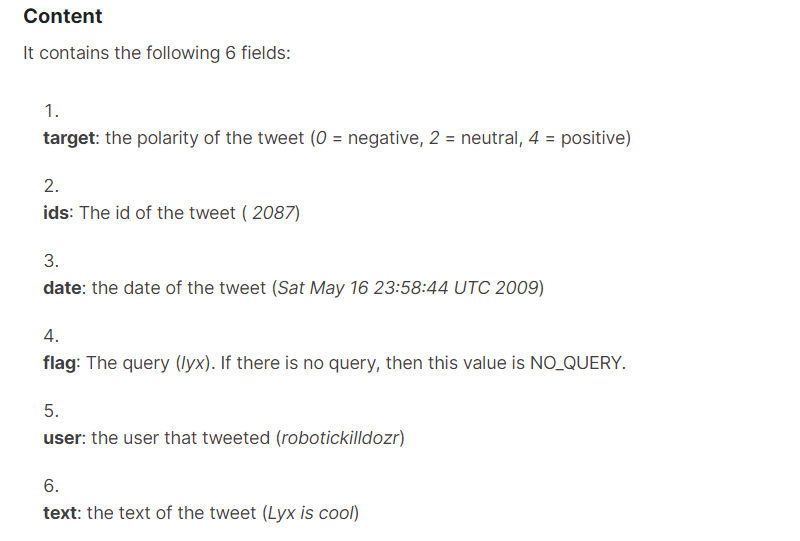


Here the column names are not added , so we are adding the column names manually and reading the data again including the column names



In [ ]:
column_names=['target','id','date','flag','user','text']
twitter_data= pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names= column_names ,encoding='ISO-8859-1')



(1600000, 6)

In [ ]:
print(twitter_data.shape)
twitter_data.head()


(1600000, 6)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Check for missing data
missing_data = twitter_data.isnull().sum()
print(missing_data)
# Remove rows with any missing data
twitter_data_clean = twitter_data.dropna()



target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [ ]:
#checking the distribution of the values , if the distribution is not uniform then we need to do upscalling and downscaling
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Upscaling and downscaling, also known as oversampling and undersampling respectively, are techniques used to address class imbalance in datasets where one class (or target variable category) is significantly underrepresented compared to others. Here’s how you can perform these operations using Python:

### Upscaling (Oversampling)

Upscaling involves increasing the number of instances in the minority class (less represented class) to balance the dataset.

#### Using `imbalanced-learn` (imblearn) Library

1. **Install `imbalanced-learn`**: If you haven't already installed it, you can do so using pip:
   ```bash
   pip install imbalanced-learn
   ```

2. **Perform Upscaling**:

   - **Random Oversampling**: Randomly duplicates examples in the minority class.

     ```python
     from imblearn.over_sampling import RandomOverSampler

     # Assuming twitter_data is your DataFrame
     X = twitter_data.drop('target', axis=1)
     y = twitter_data['target']

     oversampler = RandomOverSampler(random_state=42)
     X_resampled, y_resampled = oversampler.fit_resample(X, y)

     # Now X_resampled and y_resampled contain the upsampled data
     ```

   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic samples by interpolating between existing minority class instances.

     ```python
     from imblearn.over_sampling import SMOTE

     smote = SMOTE(random_state=42)
     X_resampled, y_resampled = smote.fit_resample(X, y)
     ```

   - **Other Techniques**: `imbalanced-learn` offers various other oversampling techniques like ADASYN, Borderline-SMOTE, etc., each with its own advantages depending on the dataset.

### Downscaling (Undersampling)

Downscaling involves reducing the number of instances in the majority class to balance the dataset.

#### Using `imbalanced-learn` (imblearn) Library

1. **Perform Downsampling**:

   - **Random Undersampling**: Randomly removes examples from the majority class.

     ```python
     from imblearn.under_sampling import RandomUnderSampler

     undersampler = RandomUnderSampler(random_state=42)
     X_resampled, y_resampled = undersampler.fit_resample(X, y)
     ```

   - **NearMiss**: Selects samples from the majority class whose average distance to the three closest instances of the minority class is smallest.

     ```python
     from imblearn.under_sampling import NearMiss

     nearmiss = NearMiss()
     X_resampled, y_resampled = nearmiss.fit_resample(X, y)
     ```

   - **ClusterCentroids**: Reduces the number of samples by replacing a cluster of samples from the majority class with the centroid of the cluster.

     ```python
     from imblearn.under_sampling import ClusterCentroids

     cc = ClusterCentroids(random_state=42)
     X_resampled, y_resampled = cc.fit_resample(X, y)
     ```

### Choosing the Right Technique

- **Considerations**: The choice between oversampling and undersampling depends on the dataset size, the nature of the problem, and the computational resources available.
- **Evaluation**: Always evaluate the performance of your model using cross-validation or other appropriate methods after applying these techniques to ensure they improve model performance.

By using these techniques from the `imbalanced-learn` library, you can effectively handle imbalanced datasets by either upscaling (oversampling) or downscaling (undersampling) to achieve a more uniform distribution of classes in your data. Adjust the technique based on your specific dataset characteristics and problem requirements.

In [ ]:
#Here we are replacing the 4's with 1's
twitter_data.replace({'target':{4:1}}, inplace=True)
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

Now we are going to perform stemming , which means reducing the word to its root word
for example
actor, actress,acting are reduced to act


In [ ]:
#intialising the stemmer
porter_stem= PorterStemmer()

In [ ]:
#Here we are defining the stemming function

def stemming(content):
  stemmed_content= re.sub('[^a-zA-Z]',' ',content)
  stemmed_content= stemmed_content.lower()
  stemmed_content= stemmed_content.split()
  stemmed_content= [porter_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content= ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
twitter_data['stemmed data']= twitter_data['text'].apply(stemming)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed data
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
X = twitter_data['stemmed data']
Y = twitter_data['target'].values

In [ ]:
print(X)

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed data, Length: 1600000, dtype: object


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


In [ ]:
#here we are giving stratify = Y , beacuse we need to get the equal dstribution of data into training and testing data which prevents that getting all the postivie data to testing
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y , test_size=0.2 , stratify= Y  , random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(1600000,) (1280000,) (320000,)
(1600000,) (1280000,) (320000,)


Converting the text data into numberical so that machine learning model can understand it

In [ ]:
vectorizer= TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
# print(X_train)
# print(X_test)
print(Y_test)


[0 1 0 ... 1 0 1]


Intialising the model for prediction and fitting the data into the model

In [ ]:
logistic_regression_model= LogisticRegression( max_iter=1000)
logistic_regression_model.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

Here we are checking the accuracy of the data using testing data

In [ ]:
X_test_prediction = logistic_regression_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7780375


Now we are going to save the model so, that we can use the data later without doing any prerocessing and training the data

In [ ]:
import pickle
filename= "trained model.sav"
pickle.dump(logistic_regression_model, open(filename, 'wb'))
filename2= "vectorizermodel.sav"
pickle.dump(vectorizer, open(filename2, 'wb'))

using the saved model for future predictions

In [ ]:
loaded_model=pickle.load(open('trained model.sav', 'rb'))

In [ ]:

X_new = X_test[1524]
predictedvalue= loaded_model.predict(X_new)
if(predictedvalue==1):
  print('Positive')
else:
  print('Negative')


Negative


In [ ]:
print(Y_test[1522])

1


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model (adjust the path as necessary)
with open('trained model.sav', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the vectorizer used during training (adjust the path as necessary)
with open('vectorizermodel.sav', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Define the input text
input_text = "I am  harmful"

# Preprocess the input text: Vectorize it using the loaded vectorizer
X_new = vectorizer.transform([input_text])

# Predict the class of the input text
predicted_value = loaded_model.predict(X_new)

# Print the prediction result
if predicted_value == 1:
    print('Positive')
else:
    print('Negative')


Positive
